# Python

#### 1. Given two lists L1 = ['a', 'b', 'c'], L2 = ['b', 'd'], find common elements, find elements present in L1 and not in L2?

In [1]:
l1 = ['a','b','c']
l2 = ['b','d']

l1_set = set(l1)
l2_set = set(l2)

##### Common Elements

In [2]:
print (l1_set.intersection(l2_set))

{'b'}


##### Elements present in L1 and not in L2

In [3]:
print (l1_set.difference(l2_set))

{'c', 'a'}


#### 2. How many Thursdays were there between 1990 - 2000?

In [4]:
from datetime import datetime,timedelta

startdate = datetime.strptime('01-01-1990','%d-%m-%Y')
enddate = datetime.strptime('01-01-2000','%d-%m-%Y')

day = timedelta(days=1)
thursday_count=0

while startdate <= enddate:
    weekday = startdate.strftime("%A")
    if weekday.startswith("Thursday") or weekday.startswith("thursday"):
        thursday_count+=1
    startdate = startdate + day
    
print (thursday_count)

522


# Analysis:

## Use case 2 - 2011 India Census

Loading India's census data from 2011 and checking for mising values if any.

In [5]:
file_location = "E:/Udacity/gramener-usecase-census/india-districts-census-2011.csv"

import pandas as pd
import numpy as np

df_census = pd.read_csv(file_location) ## Reading the data

df_census.columns[df_census.isnull().any() == 1].tolist() ## checking null values

[]

We see there is no null values in the data so we are good to go with our analysis.

For this part lets first see the columns present in the dataset.

In [6]:
from pprint import pprint

list(df_census.columns.values)
  

['District code',
 'State name',
 'District name',
 'Population',
 'Male',
 'Female',
 'Literate',
 'Male_Literate',
 'Female_Literate',
 'SC',
 'Male_SC',
 'Female_SC',
 'ST',
 'Male_ST',
 'Female_ST',
 'Workers',
 'Male_Workers',
 'Female_Workers',
 'Main_Workers',
 'Marginal_Workers',
 'Non_Workers',
 'Cultivator_Workers',
 'Agricultural_Workers',
 'Household_Workers',
 'Other_Workers',
 'Hindus',
 'Muslims',
 'Christians',
 'Sikhs',
 'Buddhists',
 'Jains',
 'Others_Religions',
 'Religion_Not_Stated',
 'LPG_or_PNG_Households',
 'Housholds_with_Electric_Lighting',
 'Households_with_Internet',
 'Households_with_Computer',
 'Rural_Households',
 'Urban_Households',
 'Households',
 'Below_Primary_Education',
 'Primary_Education',
 'Middle_Education',
 'Secondary_Education',
 'Higher_Education',
 'Graduate_Education',
 'Other_Education',
 'Literate_Education',
 'Illiterate_Education',
 'Total_Education',
 'Age_Group_0_29',
 'Age_Group_30_49',
 'Age_Group_50',
 'Age not stated',
 'Househol

In [7]:
df_census.shape

(640, 118)

## Data Wrangling

So we have 118 columns in the dataset, for our analysis we don't need all of them, let's do some Data Wrangling.

So I am grouping the dataset by State names and selecting some of the columns we need for the forst question of finding Literacy rates.

Also I needed to change the '&' to and because later on while mapping the state names to it map counterpart the names were not matching up. So I changed them here.

Also since there is no data for Telangana in dataset as the state was not formed in 2011. I made a copy of Andhra Pradesh and named it Telangana. I did this step because i was unable to find India's shape file for 2011 I was getting latest shape file with current states and this was causing error while mapping states.

After these steps I created the Literacy Rates for each state.

In [8]:
## Applying group by function and creating new data frame.
df_census_groupbystate = df_census.groupby('State name', as_index = False)[["Population","Literate","Male_Literate",
                                                                            "Female_Literate"]].sum()


df_census_groupbystate = df_census_groupbystate.replace("NCT OF DELHI", "DELHI")
df_census_groupbystate = df_census_groupbystate.replace("ANDAMAN & NICOBAR ISLANDS", "ANDAMAN and NICOBAR")
df_census_groupbystate = df_census_groupbystate.replace("DADRA & NAGAR HAVELI", "DADRA and NAGAR HAVELI")
df_census_groupbystate = df_census_groupbystate.replace("JAMMU & KASHMIR", "JAMMU and KASHMIR")
df_census_groupbystate = df_census_groupbystate.replace("DAMAN & DIU", "DAMAN and DIU")


new_row = ["TELANGANA", 84580777.0, 50556760.0, 164377, 129904]  
df_census_groupbystate.loc[len(df_census_groupbystate)] = new_row  


## Changing data type to float for calculation purpose.
df_census_groupbystate["Literate"] = df_census_groupbystate["Literate"].astype(float)
df_census_groupbystate["Population"] = df_census_groupbystate["Population"].astype(float)

## creating field Literacy Rate.
df_census_groupbystate["Literacy Rate"] = ((df_census_groupbystate["Literate"]/df_census_groupbystate["Population"]) * 100).round(2)


df_census_groupbystate

,State name,Population,Literate,Male_Literate,Female_Literate,Literacy Rate
0,ANDAMAN and NICOBAR,380581.0,294281.0,164377,129904,77.32
1,ANDHRA PRADESH,84580777.0,50556760.0,28251243,22305517,59.77
2,ARUNACHAL PRADESH,1383727.0,766005.0,439868,326137,55.36
3,ASSAM,31205576.0,19177977.0,10568639,8609338,61.46
4,BIHAR,104099452.0,52504553.0,31608023,20896530,50.44
5,CHANDIGARH,1055450.0,805438.0,465346,340092,76.31
6,CHHATTISGARH,25545198.0,15379922.0,8807893,6572029,60.21
7,DADRA and NAGAR HAVELI,343709.0,223230.0,142521,80709,64.95
8,DAMAN and DIU,243247.0,188406.0,124643,63763,77.45
9,GOA,1458545.0,1165487.0,615823,549664,79.91


In [9]:
df_census_groupbystate.head(1)

,State name,Population,Literate,Male_Literate,Female_Literate,Literacy Rate
0,ANDAMAN and NICOBAR,380581.0,294281.0,164377,129904,77.32


## 1. Create a geographic map of states with low literacy rates.

In [10]:
## importing all libraries for plotting

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase



C:\Users\anich\Anaconda3\lib\site-packages\matplotlib\legend.py:936: UserWarning: Legend does not support '' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


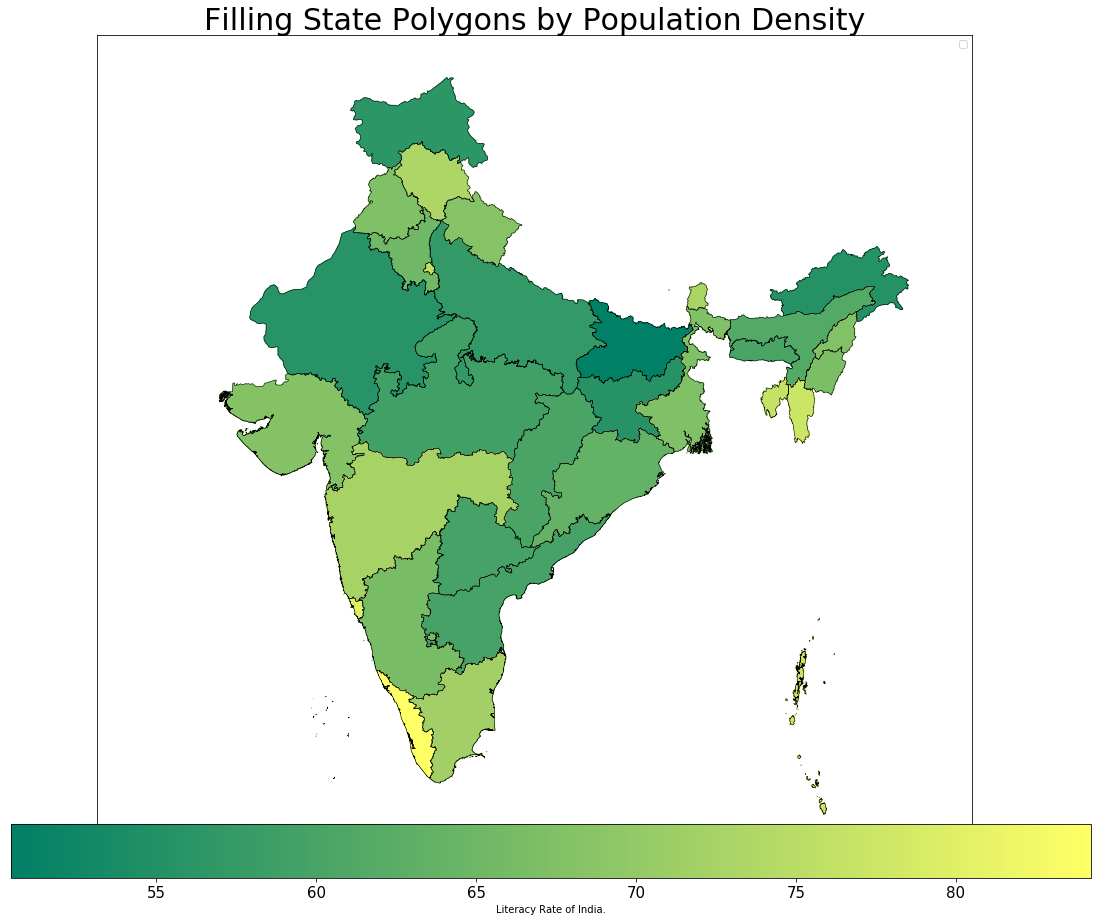

In [30]:
# Creating Basemap object with coordinates of India region such that we can plot map of India within it
m = Basemap(projection='merc', llcrnrlon=63.010732, llcrnrlat= 5.224411,
    urcrnrlon=100.100575, urcrnrlat= 36.944604, resolution='i')

fig, ax = plt.subplots() ##Creating axis and figure object for interaction

# reading the shape file
shp_info = m.readshapefile( 'C:/Users/anich/Downloads/IND_adm_shp/IND_adm1','states', drawbounds=True)

## changing state names of the dataframe to upper case and creating dictionary with state names and \
## literacy rates
df_census_groupbystate["State name"] = df_census_groupbystate["State name"].apply(lambda x: x.upper()) 
lit_rate_dict = dict(zip(df_census_groupbystate["State name"], df_census_groupbystate["Literacy Rate"]))


nodata_color = "darkorange"
colors={}
statenames=[]
patches = []

cmap = plt.cm.summer
vmin = min(lit_rate_dict.values()); vmax = max(lit_rate_dict.values())
norm = Normalize(vmin=vmin, vmax=vmax)

# color mapper to covert values to colors
mapper = ScalarMappable(norm=norm, cmap=cmap)

## Creating color dictionary for storing state names and their respective colors according to literacy rates

for shapedict in m.states_info:
    if shapedict['NAME_1'] == 'NCT of Delhi':
        shapedict['NAME_1'] = 'Delhi'
                
    statename = shapedict['NAME_1'].upper()
    if statename in lit_rate_dict:
        dens = lit_rate_dict[statename]
        colors[statename] = mapper.to_rgba(dens)
        statenames.append(statename)
    else:
        statenames.append(statename)
        colors[statename] = nodata_color
p_no = ""
        
for nshape,seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]]) 
    poly = Polygon(seg,facecolor=color,edgecolor=color)
    if (colors[statenames[nshape]] == nodata_color):
        p_no = poly
    ax.add_patch(poly)
plt.title('Filling State Polygons by Population Density', fontsize= 30)

# put legend for no data states
if p_no is  not None:
    plt.legend((p_no,), ('No data',))

# construct custom colorbar
cax = fig.add_axes([0.27, 0.1, 0.5, 0.05]) # posititon
cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='horizontal')
cb.ax.set_xlabel('Literacy Rate of India.')
plt.rcParams['figure.figsize'] = (30,15)
plt.rcParams['xtick.labelsize'] = 15
plt.show()


In [12]:
df_census_groupbystate.sort_values(["Literacy Rate"], ascending=False).reset_index(drop = True).head(5)

,State name,Population,Literate,Male_Literate,Female_Literate,Literacy Rate
0,KERALA,33406061.0,28135824.0,13704903,14430921,84.22
1,LAKSHADWEEP,64473.0,52553.0,28023,24530,81.51
2,GOA,1458545.0,1165487.0,615823,549664,79.91
3,DAMAN AND DIU,243247.0,188406.0,124643,63763,77.45
4,ANDAMAN AND NICOBAR,380581.0,294281.0,164377,129904,77.32


In [13]:
df_census_groupbystate.sort_values(["Literacy Rate"], ascending= True).reset_index(drop = True).head(5)

,State name,Population,Literate,Male_Literate,Female_Literate,Literacy Rate
0,BIHAR,104099452.0,52504553.0,31608023,20896530,50.44
1,ARUNACHAL PRADESH,1383727.0,766005.0,439868,326137,55.36
2,JHARKHAND,32988134.0,18328069.0,10882519,7445550,55.56
3,RAJASTHAN,68548437.0,38275282.0,23688412,14586870,55.84
4,JAMMU AND KASHMIR,12541302.0,7067233.0,4264671,2802562,56.35


From above we can see that Bihar, Arunachal Pradesh and Jharkhand have the lowest literacy rates. And he same is also evident from the map plotted.

## 2. How does the mobile penetration vary in regions (districts or states) with high or low agricultural workers?

Again for this question we need to filter out our dataset a bit only to work with relevant information.

In [14]:
## Creating new dataframe
df_mobility = df_census.groupby('State name', as_index = False)[["District code", "State name", "District name", "Workers", "Male_Workers","Female_Workers", 
                        "Agricultural_Workers", "Households_with_Telephone_Mobile_Phone_Mobile_only"]].sum()


## Sorting the Dataframe
df_mobility = df_mobility.sort_values(['Agricultural_Workers'], ascending=False).reset_index(drop = True)
df_mobility.head(5)

,State name,District code,Workers,Male_Workers,Female_Workers,Agricultural_Workers,Households_with_Telephone_Mobile_Phone_Mobile_only
0,UTTAR PRADESH,11857,65814715,49846762,15967953,19939223,20149607
1,BIHAR,8417,34724987,25222189,9502798,18345649,9773448
2,ANDHRA PRADESH,12489,39422906,24185595,15237311,16967754,11549740
3,MAHARASHTRA,17990,49427878,32616875,16811003,13486140,12799041
4,MADHYA PRADESH,22125,31574133,20146970,11427163,12192267,6074734


In [15]:
df_mobility.sort_values(['Households_with_Telephone_Mobile_Phone_Mobile_only'], ascending=False).reset_index(drop = True).head(5)

,State name,District code,Workers,Male_Workers,Female_Workers,Agricultural_Workers,Households_with_Telephone_Mobile_Phone_Mobile_only
0,UTTAR PRADESH,11857,65814715,49846762,15967953,19939223,20149607
1,MAHARASHTRA,17990,49427878,32616875,16811003,13486140,12799041
2,ANDHRA PRADESH,12489,39422906,24185595,15237311,16967754,11549740
3,TAMIL NADU,19760,32884681,21434978,11449703,9606547,11482800
4,BIHAR,8417,34724987,25222189,9502798,18345649,9773448


So above we sorted the data with Number of Agricultural workers and those who use mobile only,  We get a karge number of these type of folks come from Uttar Pradesh, Maharashtra and Bihar

Plotting dual bar chart for comparing the two variables

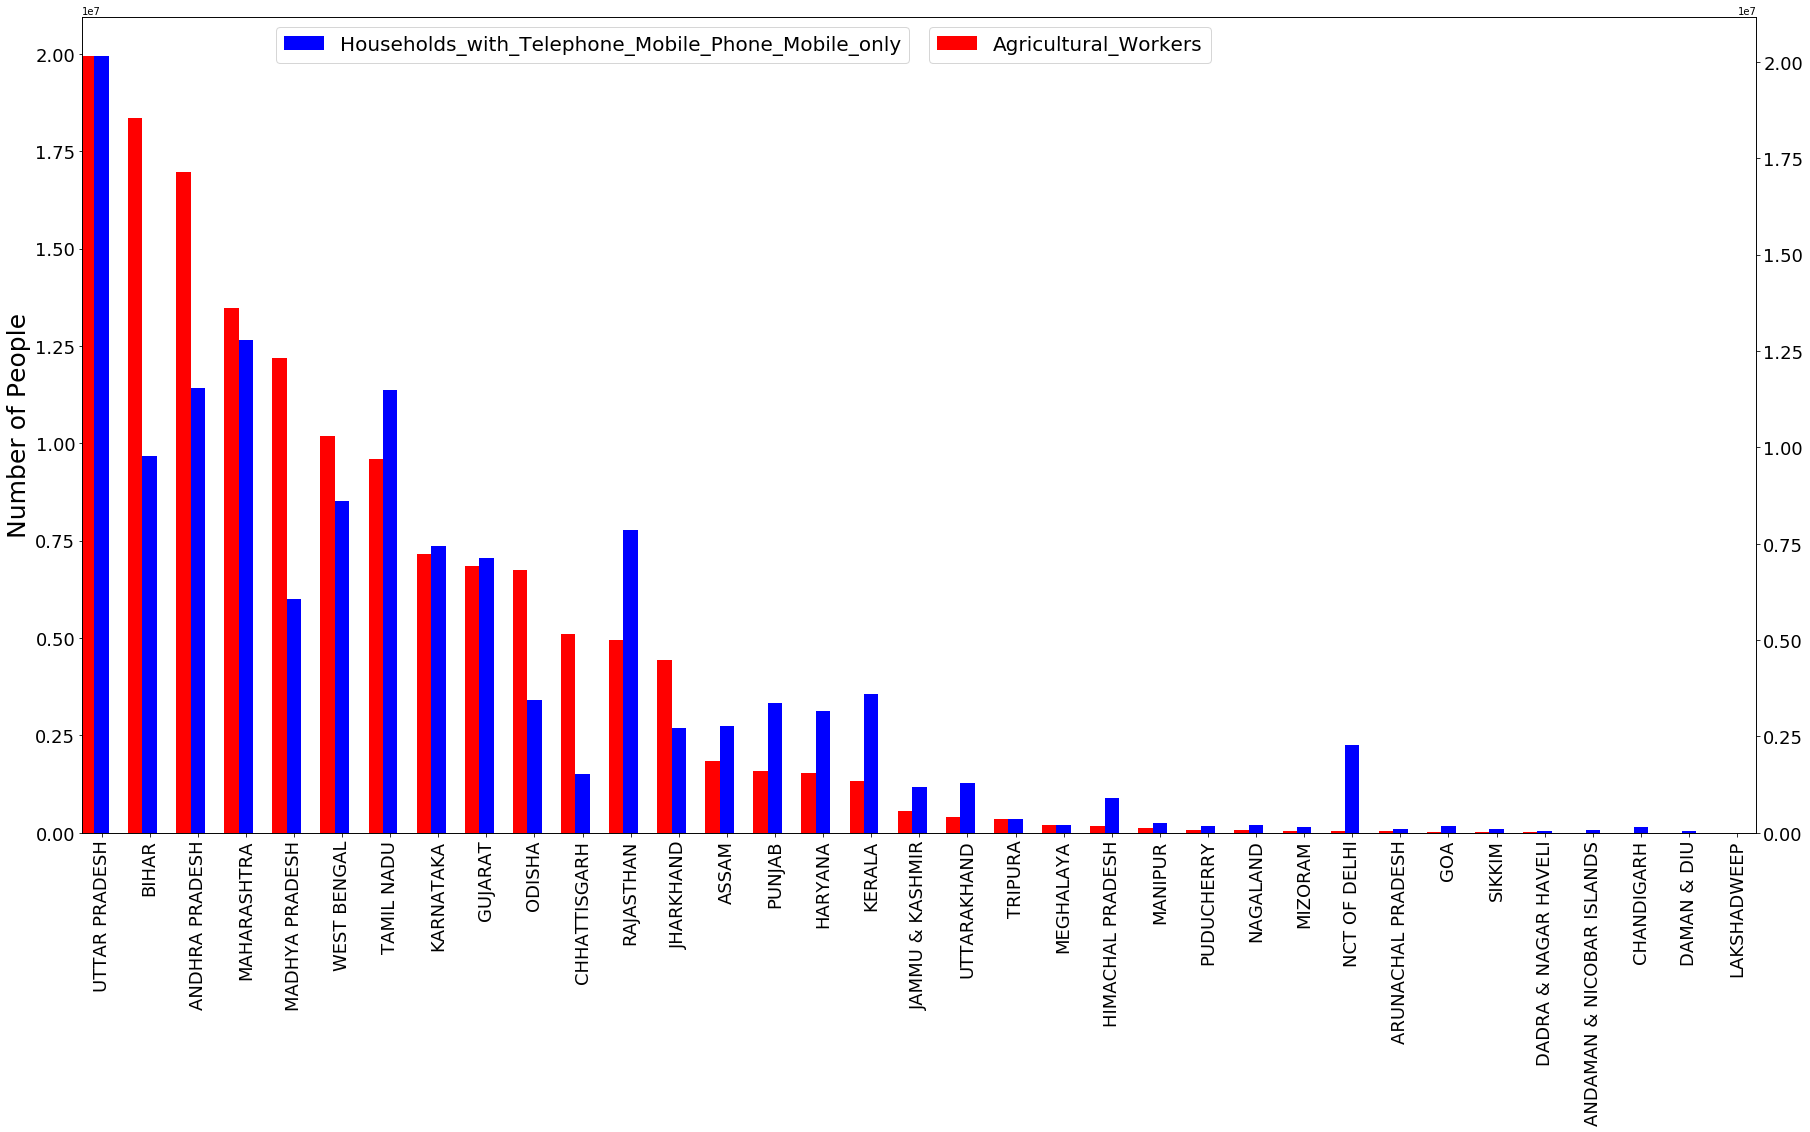

In [16]:
import numpy as np
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

df_mobility["Agricultural_Workers"].plot(kind='bar', color='red', ax=ax, width=width, position=1, fontsize=18).legend(bbox_to_anchor=(0.68, 1), fontsize = 20)
df_mobility["Households_with_Telephone_Mobile_Phone_Mobile_only"].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, fontsize=18).legend(bbox_to_anchor=(0.5, 1),fontsize = 20)

ax.set_ylabel('Number of People')
ax.yaxis.label.set_size(25)

ax.set_xticklabels((x for x in df_mobility['State name']))
ind = np.arange(35)
ax.set_xticks(ind + width / 2)
plt.show()

From the plot we can see that Uttar Pradesh and Maharashtra has almost equal number of workers and mobile users, whereas in Bihar, Andhra Pradesh and Madhya Pradesh the number of agricultural workers are more than mobile users. 

And in Tamil Nadu, Rajasthan and Delhi the reverse is True with more mobile users.

## 3. Find out most similar districts in Bihar and Tamil Nadu. Similarity can be based on any of the columns from the data.

For this part i created 2 separate data frames one for Bihar and one for Tamil Nadu such that we can compare both of them.

For finding similarity there are a number of methods but I used Cosine Similarity as it was available in sklearn's library.

Cosine similarity metric finds the normalized dot product of the two attributes. By determining the cosine similarity, we would effectively try to find the cosine of the angle between the two objects. The cosine of 0° is 1, and it is less than 1 for any other angle.

It is thus a judgement of orientation and not magnitude: two vectors with the same orientation have a cosine similarity of 1, two vectors at 90° have a similarity of 0, and two vectors diametrically opposed have a similarity of -1, independent of their magnitude.

In [17]:
## Creating 2 dataframes.
df_Bihar = df_census[df_census['State name'] == 'BIHAR'].reset_index(drop = True)
df_Tamil_Nadu = df_census[df_census['State name'] == 'TAMIL NADU'].reset_index(drop = True)

In [18]:
df_Bihar.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,203,BIHAR,Pashchim Champaran,3935042,2061110,1873932,1759481,1091226,668255,553944,...,621,1968,138,21,159,30,49,79,40,3181
1,204,BIHAR,Purba Champaran,5099371,2681209,2418162,2276957,1407603,869354,649726,...,797,2551,223,18,241,25,40,65,47,4098
2,205,BIHAR,Sheohar,656246,346673,309573,283698,171645,112053,96655,...,90,301,4,1,5,2,3,5,4,489
3,206,BIHAR,Sitamarhi,3423574,1803252,1620322,1436794,885188,551606,405714,...,520,1670,69,10,79,14,22,36,29,2679
4,207,BIHAR,Madhubani,4487379,2329313,2158066,2155338,1340085,815253,587158,...,668,2203,165,7,172,10,17,27,26,3520


In [19]:
df_Tamil_Nadu.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,602,TAMIL NADU,Thiruvallur,3728104,1876062,1852042,2791721,1495711,1296010,821646,...,1732,3672,1137,455,1592,472,876,1348,580,7731
1,603,TAMIL NADU,Chennai,4646732,2335844,2310888,3776276,1968079,1808197,779667,...,3685,5802,1954,1866,3820,748,1214,1962,3686,15742
2,604,TAMIL NADU,Kancheepuram,3998252,2012958,1985294,3013382,1611461,1401921,948081,...,1965,3958,1138,560,1698,522,832,1354,797,8349
3,605,TAMIL NADU,Vellore,3936331,1961688,1974643,2773928,1504355,1269573,860212,...,1670,4125,1082,579,1661,340,777,1117,402,8092
4,606,TAMIL NADU,Tiruvannamalai,2464875,1235889,1228986,1626813,909803,717010,565329,...,798,2317,483,324,807,118,271,389,131,4189


Replacing row index with District name so that it is easy for us to figure out which district is matching with the other state's district. Also another reason is that the cosine_similarity pairwise method from sklearn library does not accept string values.

For this reason I remove the State names.

In [20]:
df_Bihar.set_index('District name',inplace=True)
df_Tamil_Nadu.set_index('District name',inplace=True)

In [21]:
df_Bihar = df_Bihar.drop(['State name'],axis=1)

In [22]:
df_Tamil_Nadu = df_Tamil_Nadu.drop(['State name'],axis=1)

In [23]:
df_Tamil_Nadu.head()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
District name,,,,,,,,,,,,,,,,,,,,,
Thiruvallur,602,3728104,1876062,1852042,2791721,1495711,1296010,821646,410526,411120,...,1732,3672,1137,455,1592,472,876,1348,580,7731
Chennai,603,4646732,2335844,2310888,3776276,1968079,1808197,779667,389001,390666,...,3685,5802,1954,1866,3820,748,1214,1962,3686,15742
Kancheepuram,604,3998252,2012958,1985294,3013382,1611461,1401921,948081,474264,473817,...,1965,3958,1138,560,1698,522,832,1354,797,8349
Vellore,605,3936331,1961688,1974643,2773928,1504355,1269573,860212,424668,435544,...,1670,4125,1082,579,1661,340,777,1117,402,8092
Tiruvannamalai,606,2464875,1235889,1228986,1626813,909803,717010,565329,282615,282714,...,798,2317,483,324,807,118,271,389,131,4189


In [24]:
df_Bihar.head()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
District name,,,,,,,,,,,,,,,,,,,,,
Pashchim Champaran,203,3935042,2061110,1873932,1759481,1091226,668255,553944,289191,264753,...,621,1968,138,21,159,30,49,79,40,3181
Purba Champaran,204,5099371,2681209,2418162,2276957,1407603,869354,649726,340363,309363,...,797,2551,223,18,241,25,40,65,47,4098
Sheohar,205,656246,346673,309573,283698,171645,112053,96655,51089,45566,...,90,301,4,1,5,2,3,5,4,489
Sitamarhi,206,3423574,1803252,1620322,1436794,885188,551606,405714,213624,192090,...,520,1670,69,10,79,14,22,36,29,2679
Madhubani,207,4487379,2329313,2158066,2155338,1340085,815253,587158,303389,283769,...,668,2203,165,7,172,10,17,27,26,3520


In [25]:
## importing the pairwise library and cosine_similarity function for getting the similarity matrix of the 2 data frames
from sklearn.metrics.pairwise import cosine_similarity
sim_df = cosine_similarity(df_Bihar,df_Tamil_Nadu)

sim_df ##similarity matrix

array([[ 0.93015436,  0.90044417,  0.93061581, ...,  0.96038847,
         0.91187901,  0.92270601],
       [ 0.93495397,  0.90637786,  0.93524772, ...,  0.96436697,
         0.91700122,  0.92721842],
       [ 0.92629141,  0.89233833,  0.92654769, ...,  0.95819641,
         0.90718045,  0.92021866],
       ..., 
       [ 0.94013837,  0.90940353,  0.94066708, ...,  0.97055383,
         0.92136445,  0.93291388],
       [ 0.94811038,  0.92199925,  0.94841983, ...,  0.97045004,
         0.92827776,  0.93482955],
       [ 0.94646529,  0.92045121,  0.94693874, ...,  0.9699247 ,
         0.92706073,  0.93373976]])

In [26]:
#Creating the dataframe that holds index and column values for Bihar and Tamilnadu. 
combined_df = pd.DataFrame(sim_df, index=df_Bihar.index, columns=df_Tamil_Nadu.index)
combined_df.head()



District name,Thiruvallur,Chennai,Kancheepuram,Vellore,Tiruvannamalai,Viluppuram,Salem,Namakkal,Erode,The Nilgiris,...,Theni,Virudhunagar,Ramanathapuram,Thoothukkudi,Tirunelveli,Kanniyakumari,Dharmapuri,Krishnagiri,Coimbatore,Tiruppur
District name,,,,,,,,,,,,,,,,,,,,,
Pashchim Champaran,0.930154,0.900444,0.930616,0.951022,0.957777,0.959996,0.944474,0.933559,0.931483,0.920131,...,0.940796,0.933702,0.945462,0.932166,0.939509,0.888325,0.960726,0.960388,0.911879,0.922706
Purba Champaran,0.934954,0.906378,0.935248,0.955651,0.960188,0.961851,0.948499,0.937612,0.935308,0.923970,...,0.944228,0.939007,0.951386,0.938331,0.944354,0.895939,0.963876,0.964367,0.917001,0.927218
Sheohar,0.926291,0.892338,0.926548,0.945252,0.952604,0.955616,0.943243,0.931534,0.930385,0.912126,...,0.936321,0.930892,0.933956,0.926405,0.933657,0.878838,0.959933,0.958196,0.907180,0.920219
Sitamarhi,0.922128,0.890530,0.922420,0.942629,0.948401,0.951050,0.939014,0.926132,0.925501,0.909535,...,0.931446,0.926515,0.933012,0.923195,0.931182,0.879984,0.956257,0.955482,0.903463,0.915812
Madhubani,0.938853,0.909163,0.939260,0.959816,0.966273,0.968294,0.953920,0.942982,0.940337,0.928899,...,0.948584,0.943652,0.954365,0.941918,0.948727,0.898751,0.970146,0.969671,0.920441,0.931288


Now the best way to plot a matrix of values ranging from [0-1] is by using a Heatmap. 

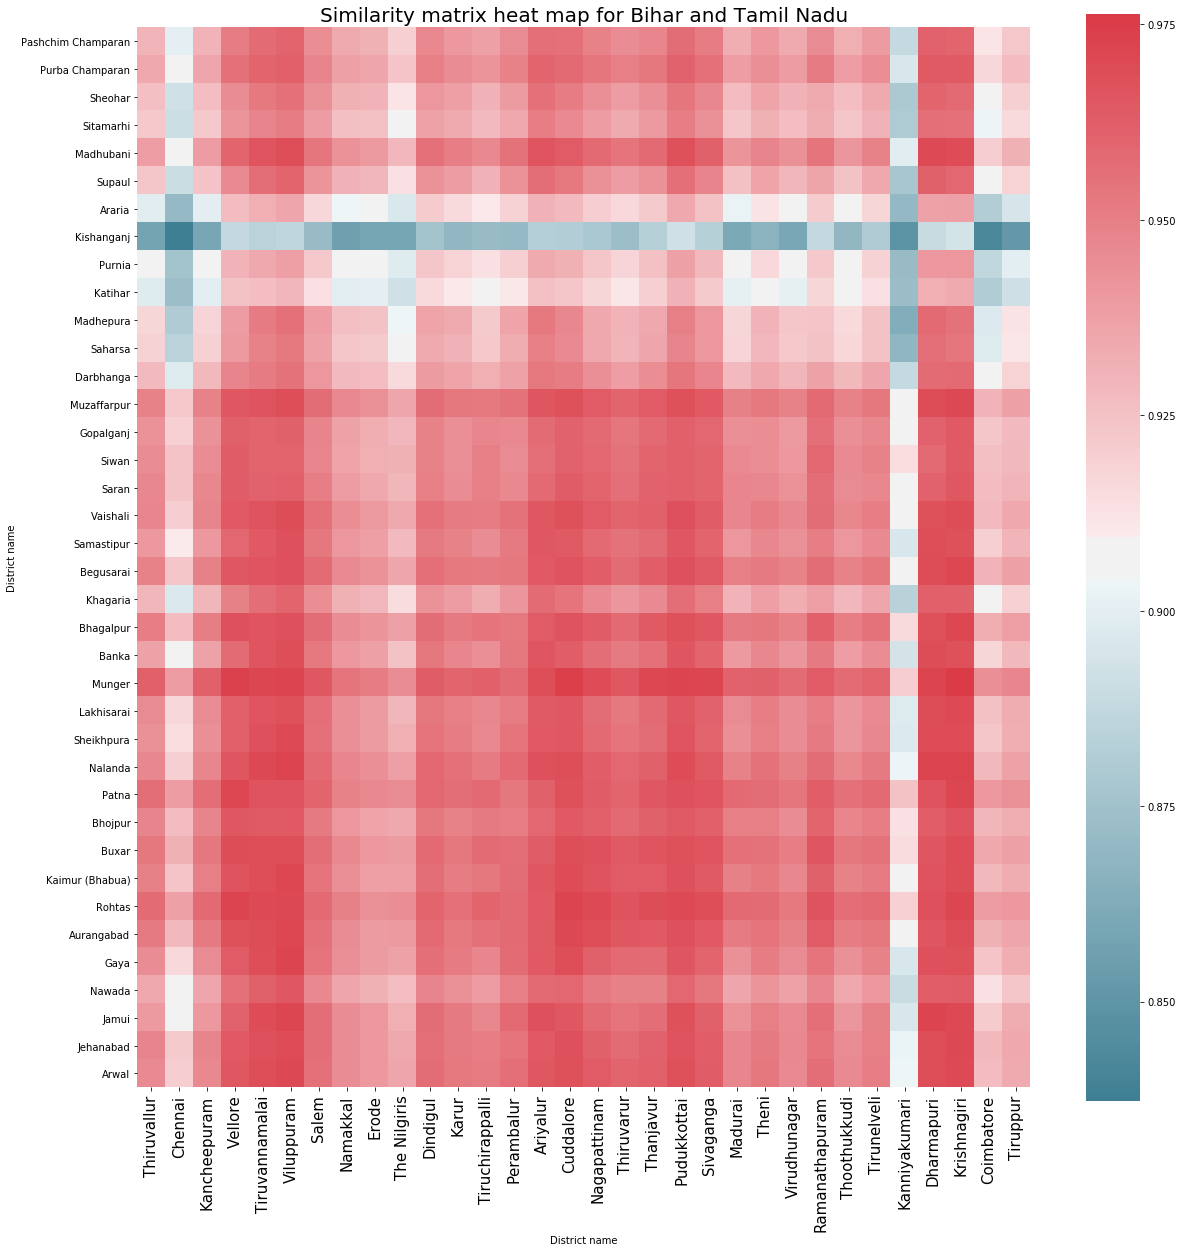

In [27]:
import seaborn as sns ## importing seaborn

f, ax = plt.subplots(figsize=(20, 20))

## making the heatmap
sns.heatmap(combined_df, mask=np.zeros_like(combined_df, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.title('Similarity matrix heat map for Bihar and Tamil Nadu', fontsize = 20);

We see that almost all the districts have similarity between them, except for Kishanganj. Kishanganj does not have total similar with the districts of Tamil Nadu. But ots pretty close because if we see the range of values it starts from 0.8 and goes till 1. So we can say that most of the districts are similar to each other.

Next let's find the district in Bihar and Tamil Nadu which has the maximum similarity.

In [32]:
# Maximum value in the similarity df
max_val = float(combined_df.values.max())



# index of the maximum value
idx = combined_df.values.argmax()

for column in combined_df:
    #print(list(combined_df[column].values))
    if max_val in list(combined_df[column].values):
        tamil_dist = str(column)
        


for pos, ele in enumerate(list(combined_df.loc[:,tamil_dist])):
    if  max_val == ele:
        idx =  (pos)

bihar_dist =  str(combined_df.index[idx])


print ("Bihar's District with most similarity is %s" % bihar_dist)
print ("Tamil Nadu's District with most similarity is %s" % tamil_dist)

Bihar's District with most similarity is Munger
Tamil Nadu's District with most similarity is Krishnagiri


So according to Cosine Similarity Munger and Krishnagiri asre the most similar districts

## Bibliography

1. https://www.codesd.com/item/how-to-use-basemap-python-to-plot-the-united-states-with-50-states.html
2. http://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/
3. https://www.latlong.net/
4. https://gadm.org/download_country.html
5. https://www.google.co.in/amp/s/peak5390.wordpress.com/2012/12/08/matplotlib-basemap-tutorial-making-a-simple-map/amp/

    

In [29]:














'''
from geopy.geocoders import Nominatim

geolocator = Nominatim()

df_census_groupbystate['City_Coord'] = df_census_groupbystate['State name'].apply(geolocator.geocode, timeout=15)

df_census_groupbystate['City_Coord'] = df_census_groupbystate['City_Coord'].apply(lambda x: (x.latitude, x.longitude))


map = Basemap(projection='merc', lat_0=57, lon_0=-135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=63.010732, llcrnrlat= 5.224411,
    urcrnrlon=100.100575, urcrnrlat= 36.944604)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
 
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

plt.rcParams['figure.figsize'] = (12,12)
plt.show()

def make_map():
    fig, ax = plt.subplots()
    m = Basemap(projection='merc', llcrnrlon=63.010732, llcrnrlat= 5.224411,
    urcrnrlon=100.100575, urcrnrlat= 36.944604, resolution='i')
    m.ax = ax
    m.fillcontinents()
    return fig, m


def drawstates(ax, shapefile='C:/Users/anich/IND_adm_shp/IND_adm1'):
        shp = m.readshapefile(shapefile, 'states', drawbounds=True)
        for nshape, seg in enumerate(m.states):
            poly = Polygon(seg, facecolor='0.75', edgecolor='k')
            ax.add_patch(poly)
            
            
#fig, m = make_map()
#m.drawcountries()
#m.drawstates()
'''

"\nfrom geopy.geocoders import Nominatim\n\ngeolocator = Nominatim()\n\ndf_census_groupbystate['City_Coord'] = df_census_groupbystate['State name'].apply(geolocator.geocode, timeout=15)\n\ndf_census_groupbystate['City_Coord'] = df_census_groupbystate['City_Coord'].apply(lambda x: (x.latitude, x.longitude))\n\n\nmap = Basemap(projection='merc', lat_0=57, lon_0=-135,\n    resolution = 'h', area_thresh = 0.1,\n    llcrnrlon=63.010732, llcrnrlat= 5.224411,\n    urcrnrlon=100.100575, urcrnrlat= 36.944604)\n \nmap.drawcoastlines()\nmap.drawcountries()\nmap.fillcontinents(color = 'coral')\nmap.drawmapboundary()\n \nmap.drawmeridians(np.arange(0, 360, 30))\nmap.drawparallels(np.arange(-90, 90, 30))\n\nplt.rcParams['figure.figsize'] = (12,12)\nplt.show()\n\ndef make_map():\n    fig, ax = plt.subplots()\n    m = Basemap(projection='merc', llcrnrlon=63.010732, llcrnrlat= 5.224411,\n    urcrnrlon=100.100575, urcrnrlat= 36.944604, resolution='i')\n    m.ax = ax\n    m.fillcontinents()\n    return f